In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.to_datetime('2016/12/02')

Timestamp('2016-12-02 00:00:00')

In [4]:
df = pd.read_csv('opsd_germany_daily.csv',index_col='Date',parse_dates=True)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


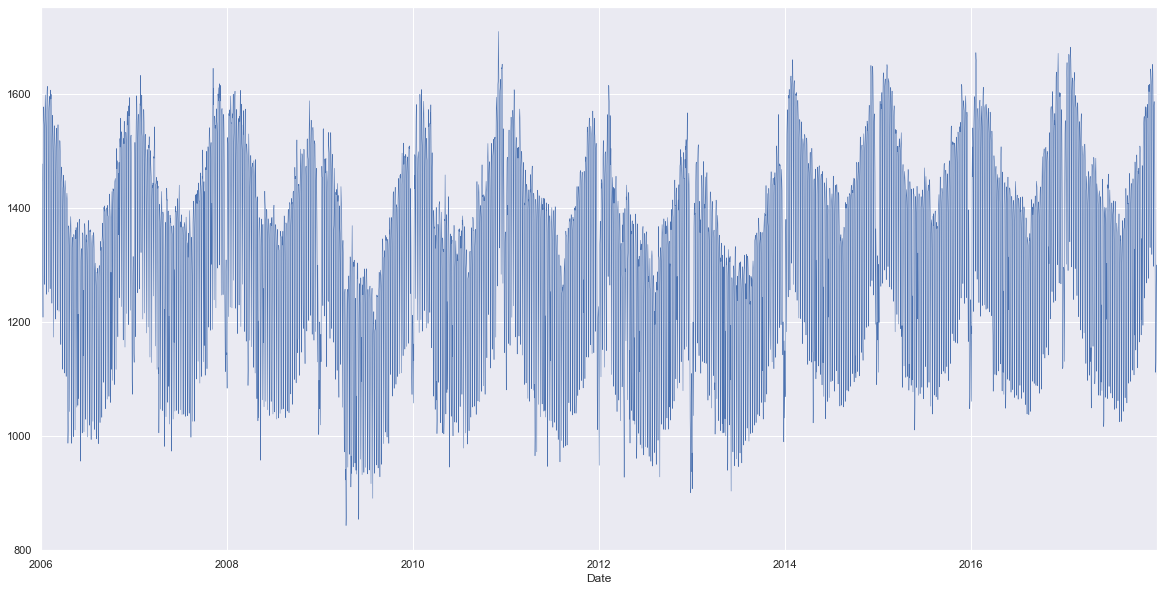

In [5]:
sns.set(rc={'figure.figsize':(20, 10)})
df['Consumption'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

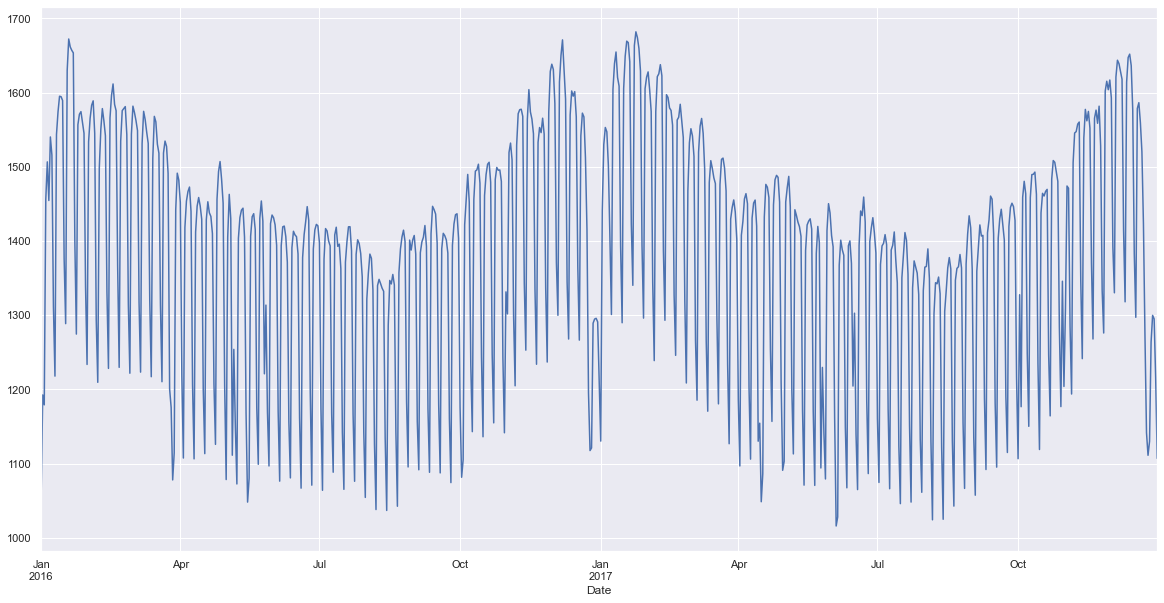

In [6]:
df['Consumption']['2016':'2017'].plot()

<AxesSubplot:xlabel='Date'>

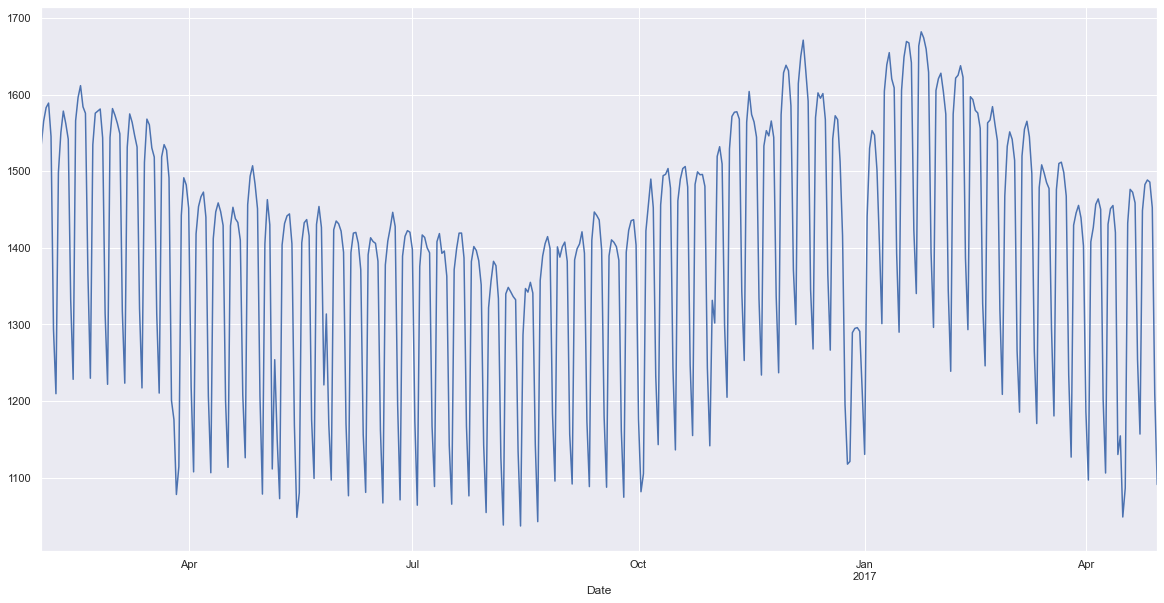

In [7]:
df['Consumption']['2016/02':'2017/04'].plot()

In [8]:
df2= df['Consumption']['2016']
df2.head()

Date
2016-01-01    1060.366
2016-01-02    1192.698
2016-01-03    1179.282
2016-01-04    1456.294
2016-01-05    1506.737
Name: Consumption, dtype: float64

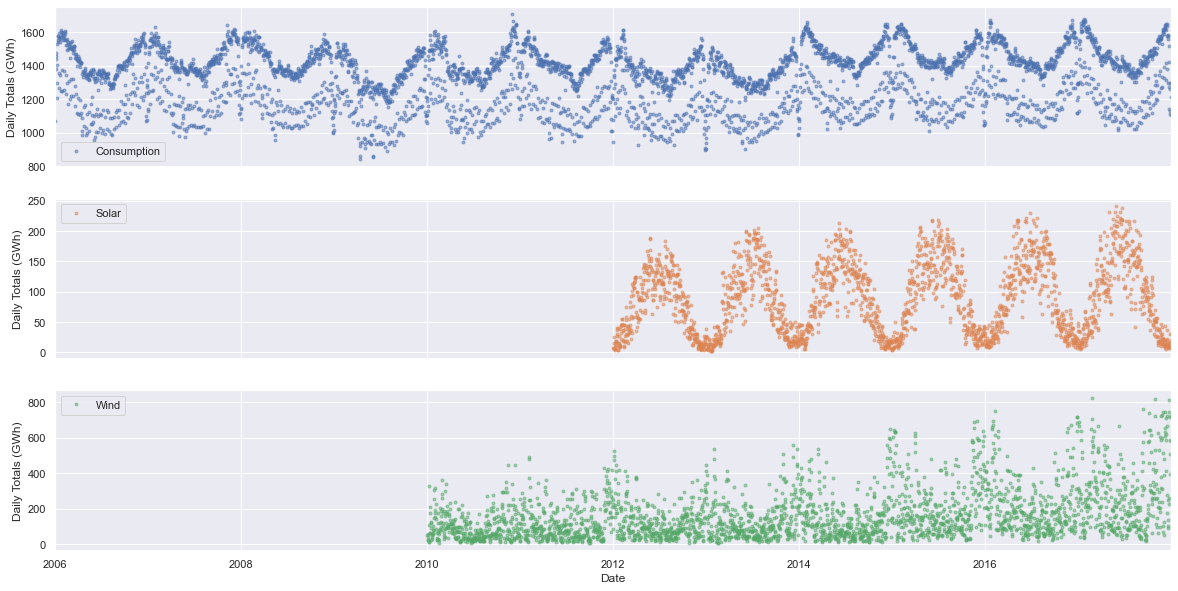

In [9]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')


<Figure size 1440x720 with 0 Axes>

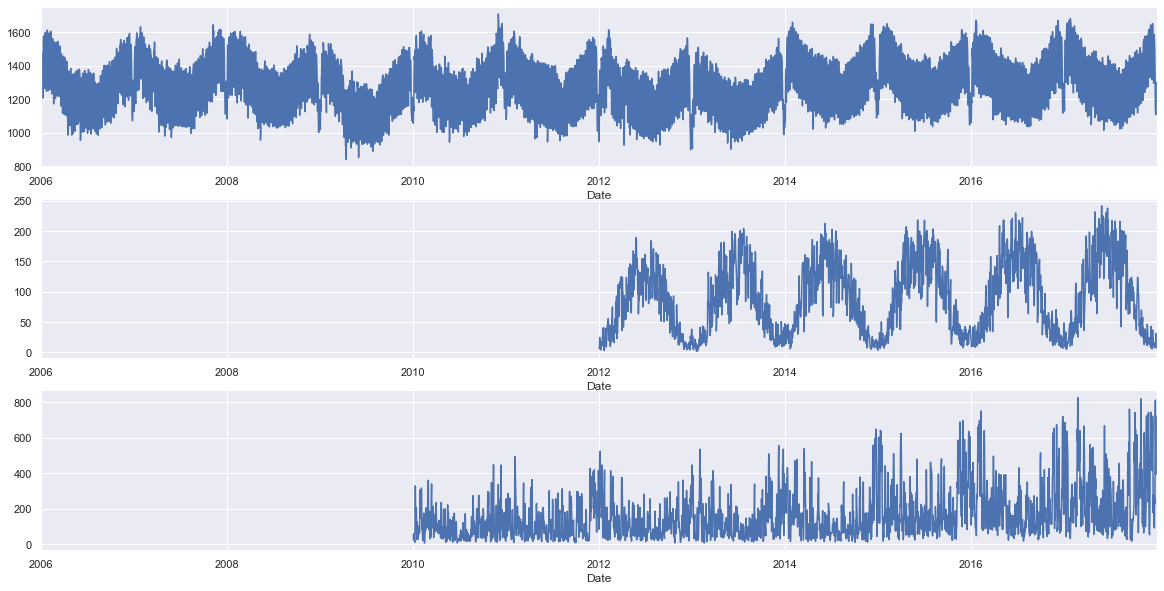

In [10]:
cols_plot = ['Consumption', 'Solar', 'Wind']
plt.figure(figsize=(20,10))
plt.subplots(3,1)

for i in range(0,3):
    plt.subplot(3,1,i+1)
    df[cols_plot[i]].plot()


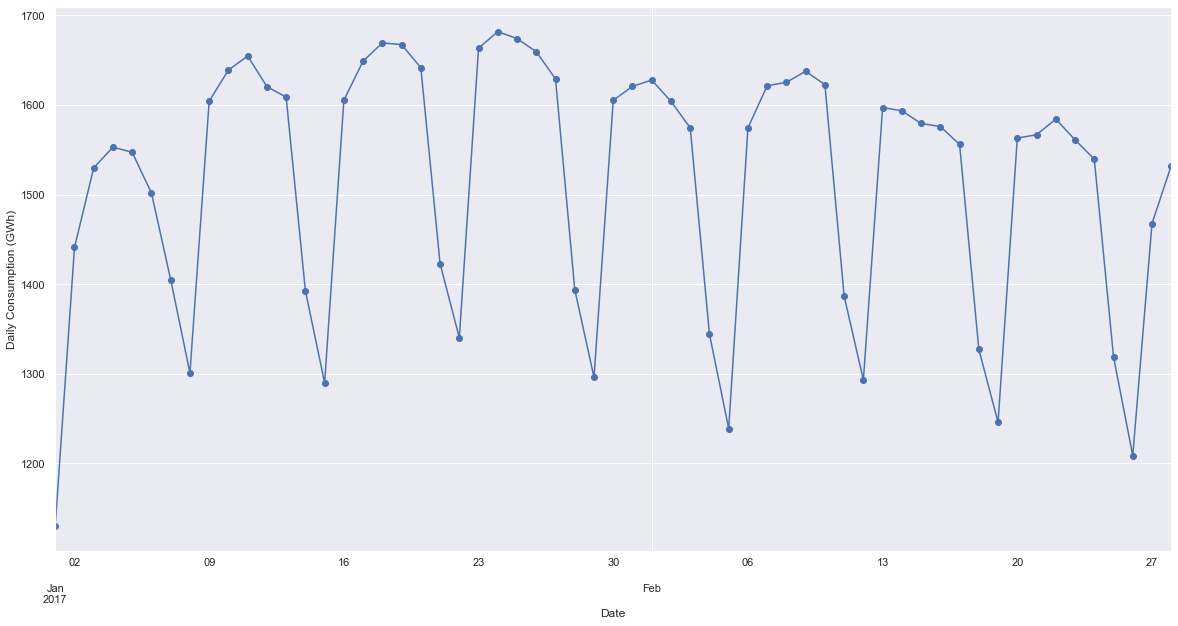

In [11]:
ax = df.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


In [12]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.weekday
df

,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


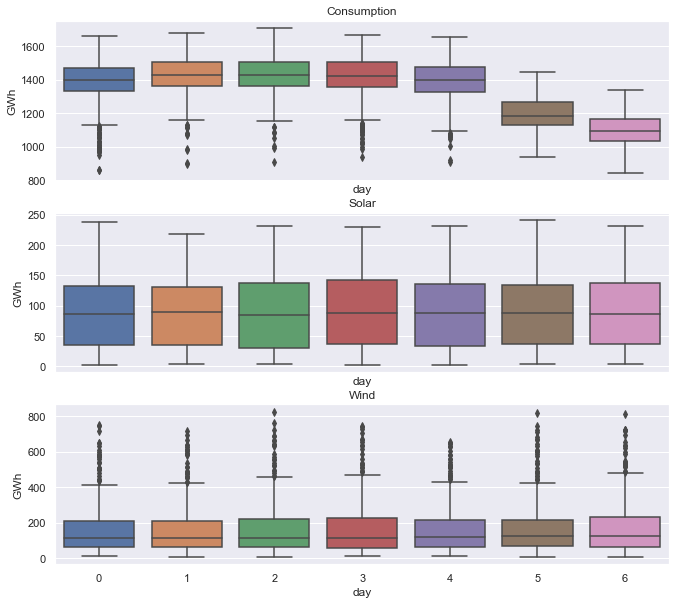

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=df, x='day', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name) 
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')


<AxesSubplot:xlabel='Date'>

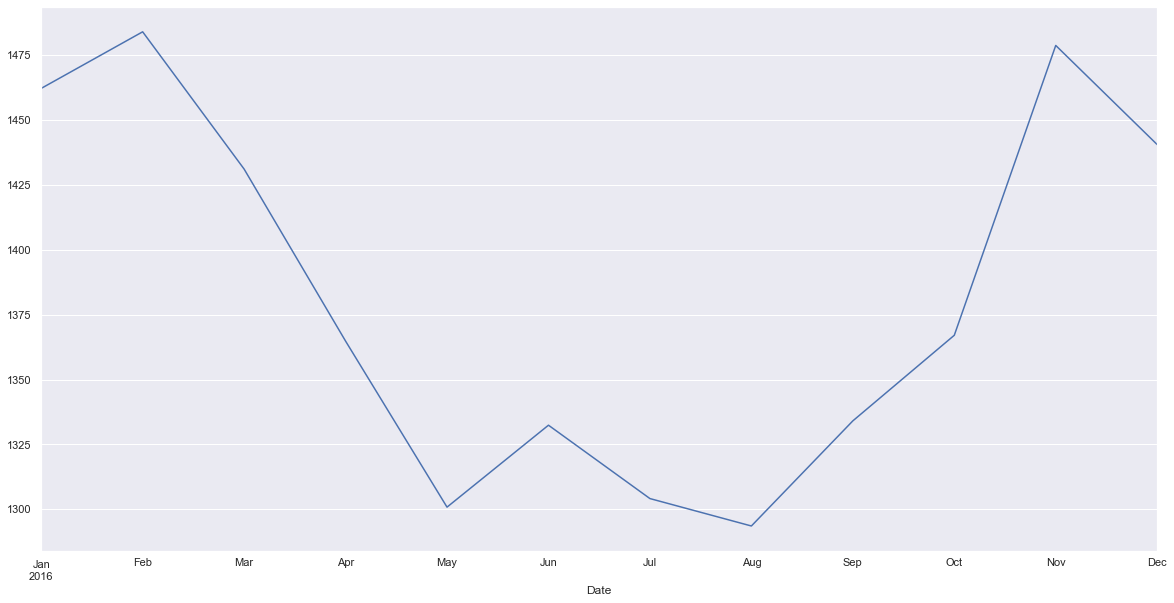

In [14]:
df['Consumption']['2016'].resample('m').mean().plot()

<AxesSubplot:xlabel='Date'>

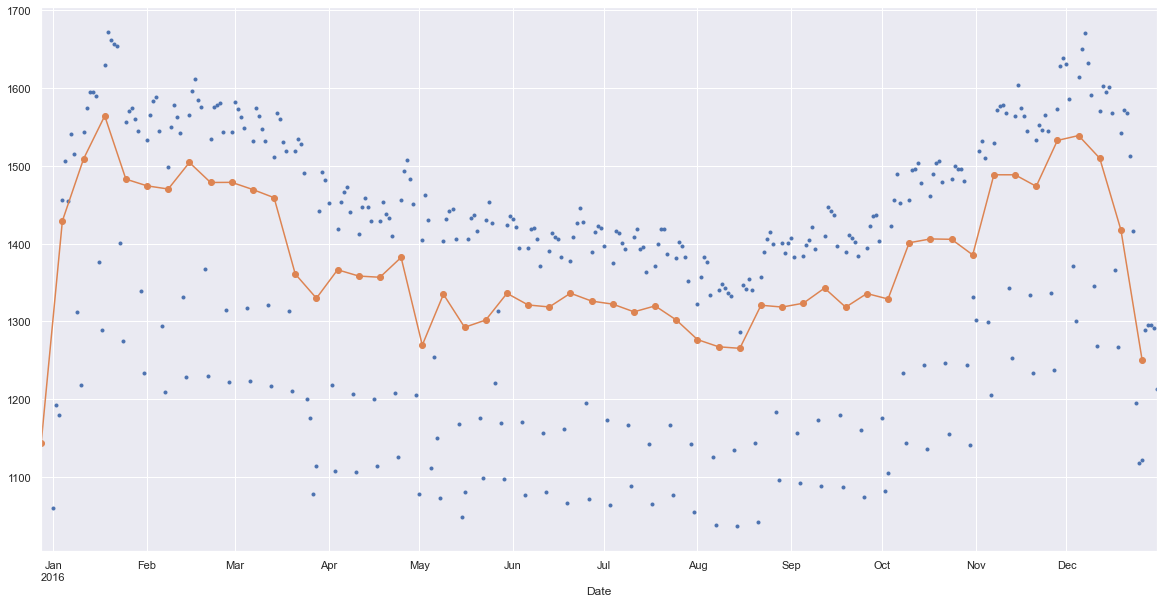

In [15]:
df['Consumption']['2016'].plot(label='data 2016',ls='None',marker='.')
df['Consumption']['2016'].resample('w').mean().plot(label='resempele 2016 m',marker='o')

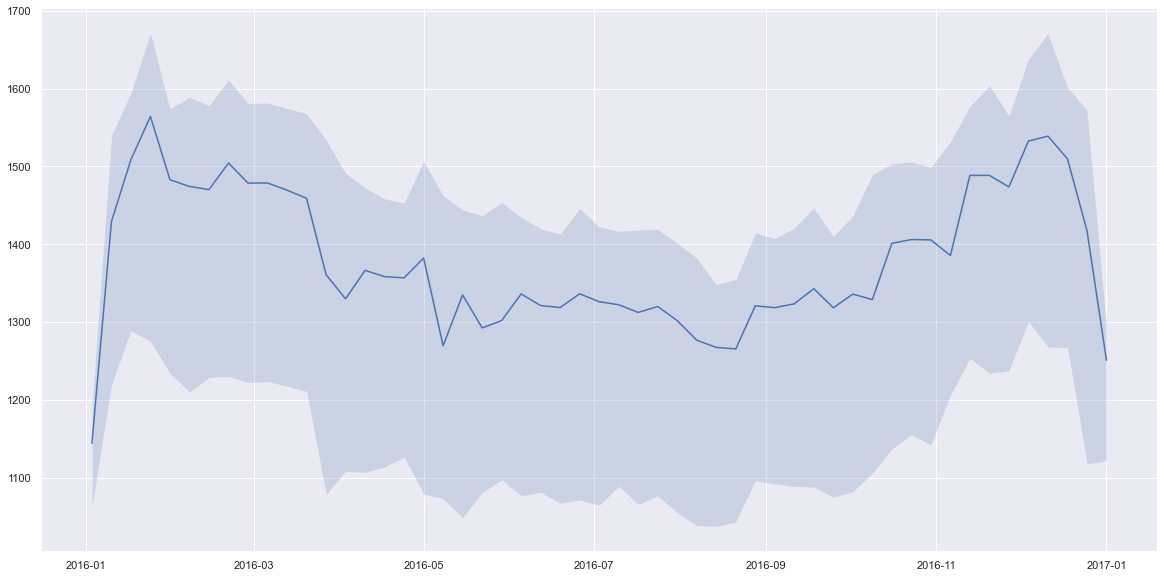

In [16]:
m = df['Consumption']['2016'].resample('W').agg(['mean','std','min','max'])
plt.plot(m.index,m['mean'])
plt.fill_between(m.index,m['max'],m['min'],alpha=0.2,label='min-max per semaine')

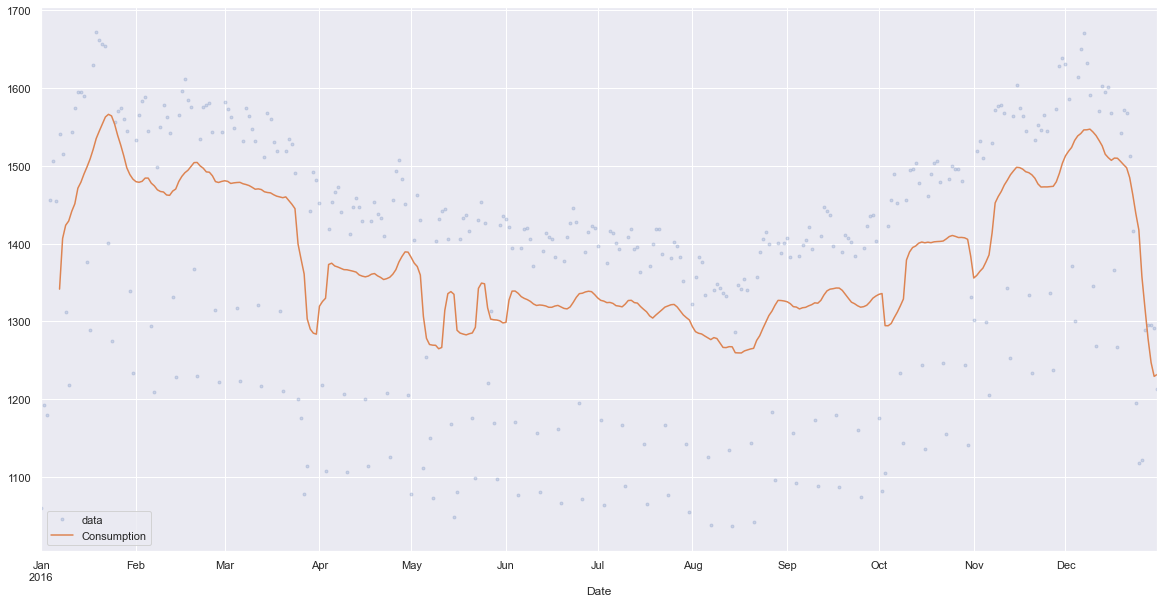

In [17]:
from matplotlib import markers


df['Consumption']['2016'].plot(label='data',ls='None',marker='.',alpha=0.2)
df['Consumption']['2016'].rolling(window=7).mean().plot()
plt.legend()


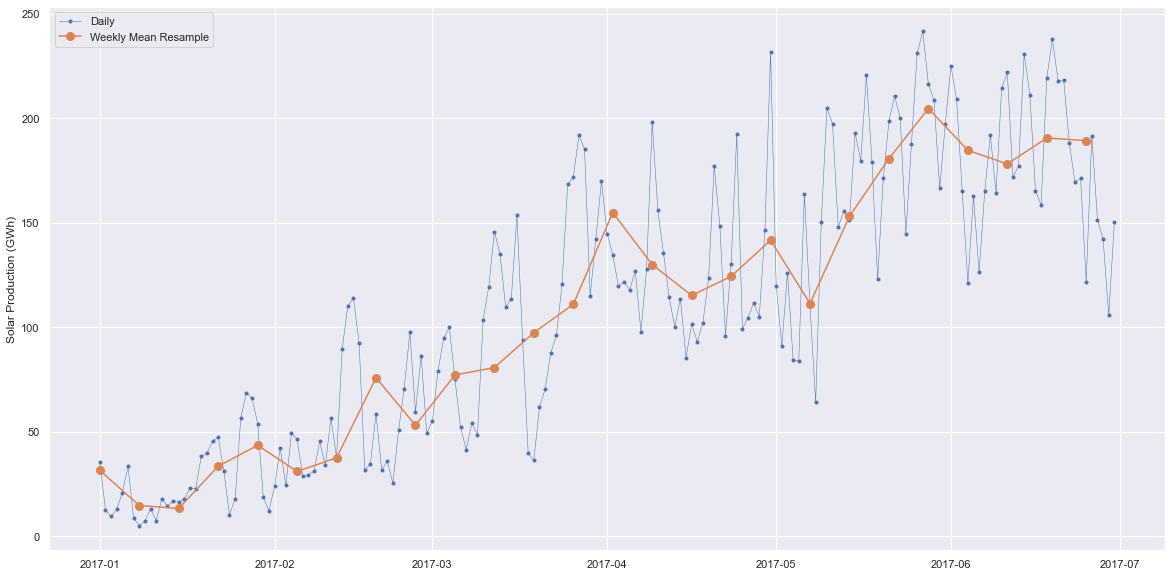

In [19]:

# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
df_mean = df[data_columns].resample('W').mean()
df_mean.head(3)


# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();


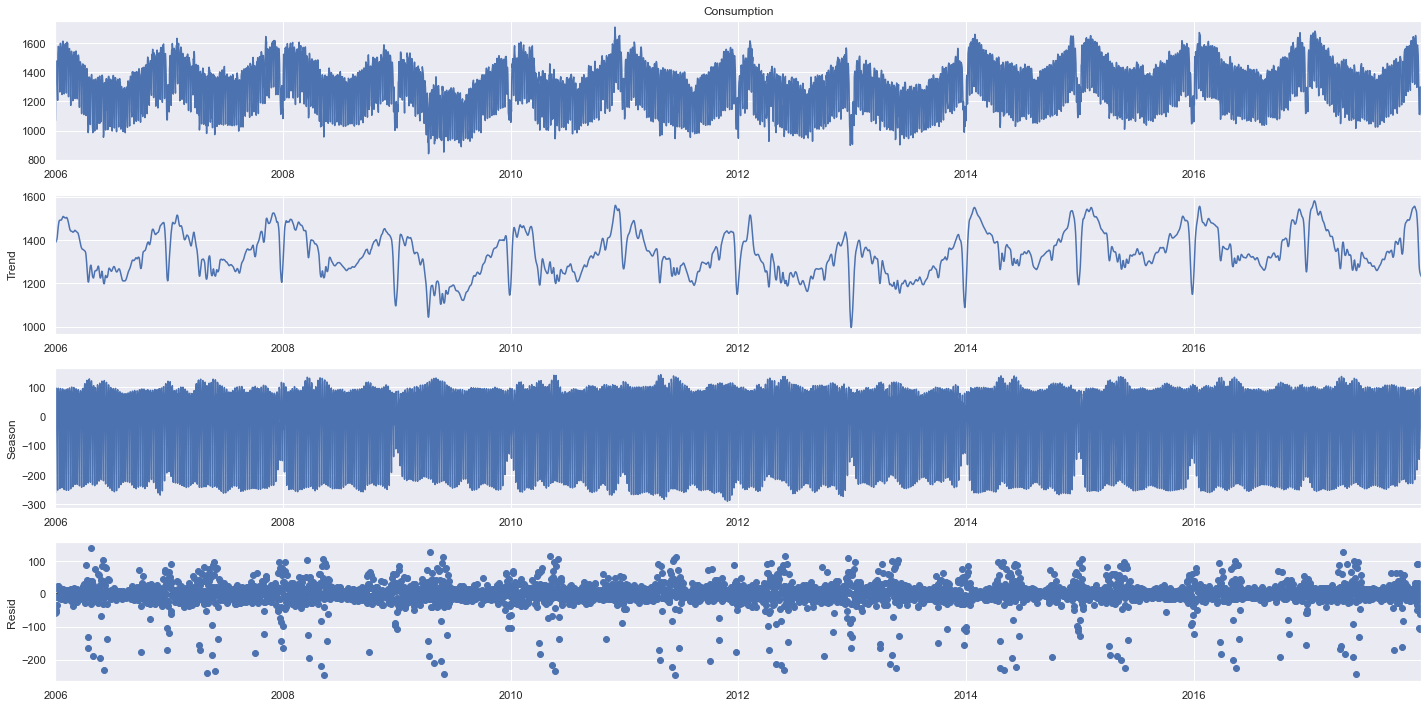

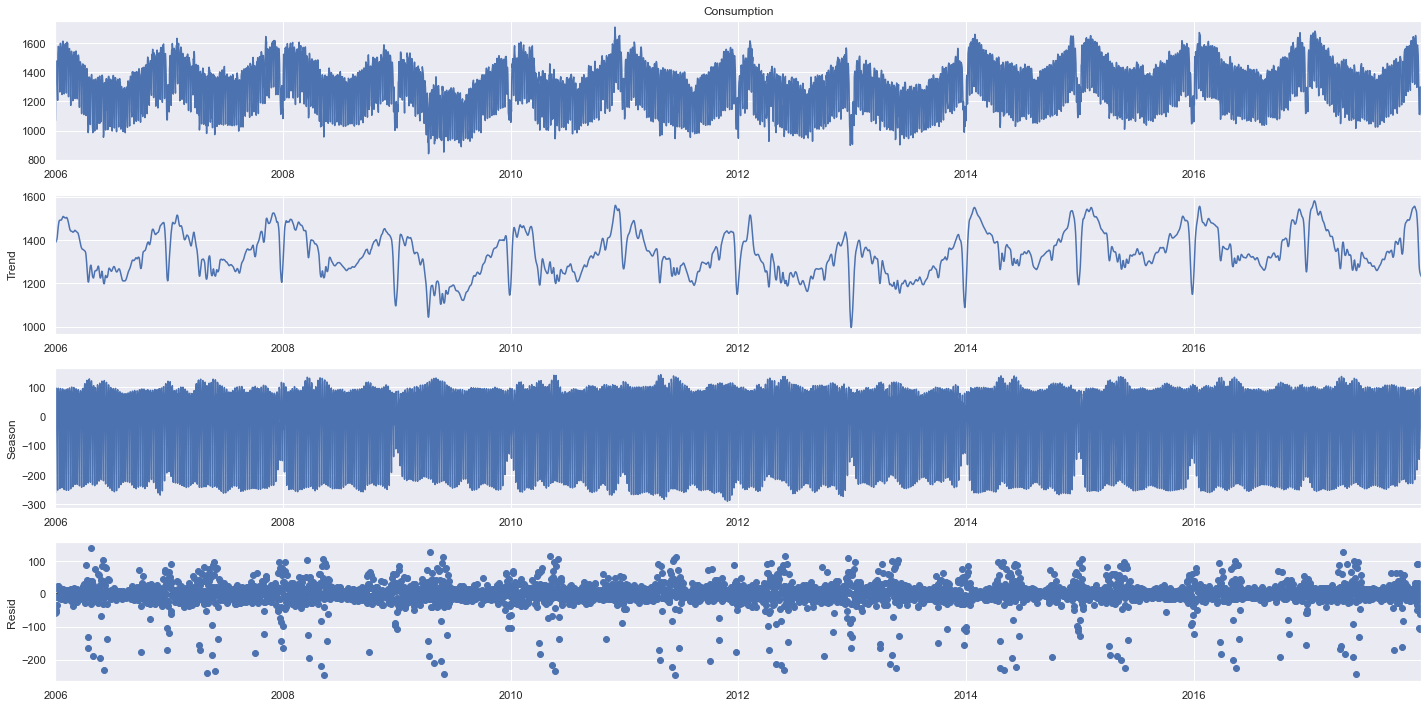

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['Consumption'],7)
res_robust = stl.fit()
res_robust.plot()